In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



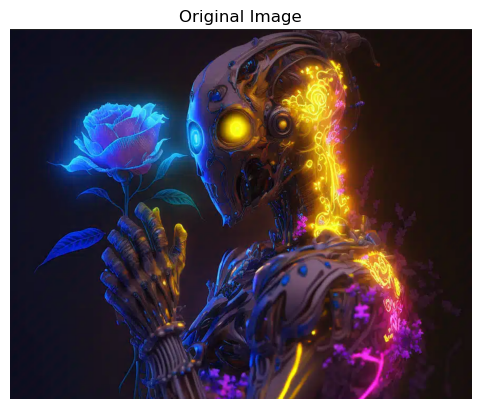

In [3]:
# 이미지 불러오기

image = cv2.imread('../image/image3.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Matplotlib 으로 이미지 출력
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.title('Original Image')
plt.show()

- cv2.cvtColor(img, cv2.COLOR_BGR2RGB) : BGR => 그레이스케일 변환
- plt.his(image.ravel(), bins=256, range=[0,256]) : 히스토그램 생성


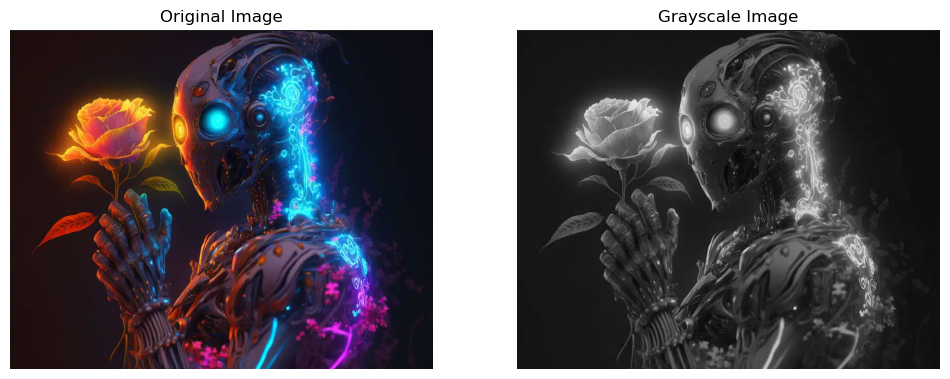

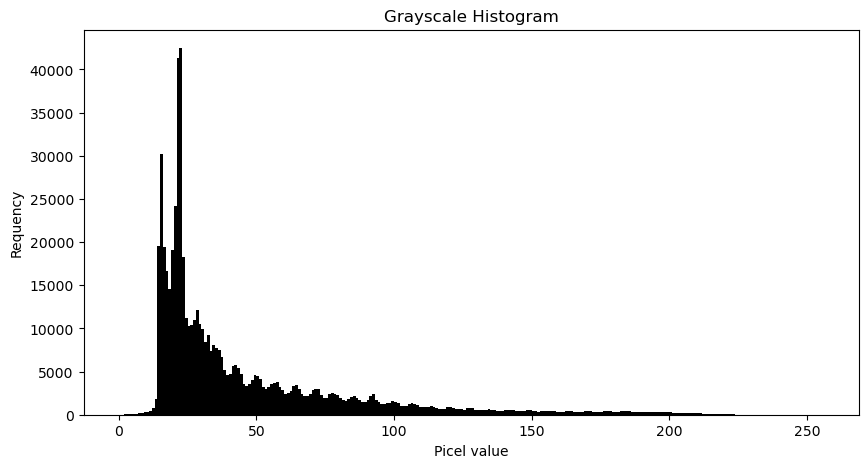

In [4]:
# 그레이스케일 변환

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1,2, figsize =(12,6))

# 원본이미지
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# 그레이스케일 이미지
axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

plt.show()


# 히스토그램 시각화

plt.figure(figsize=(10,5))
plt.hist(gray.ravel(), bins=256, range=[0,256], color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Picel value')
plt.ylabel('Requency')
plt.show()


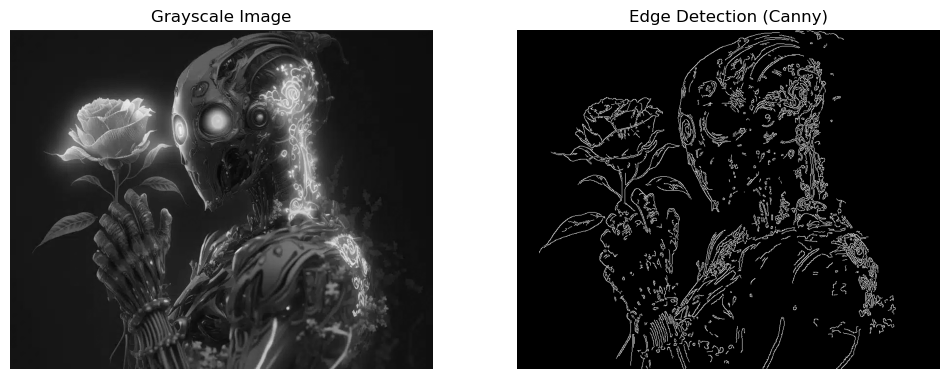

In [5]:
# 엣지 검출 적용
edges = cv2.Canny(gray, 100, 200)

# 원본 & 엣지 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edge Detection (Canny)')
axes[1].axis('off')

plt.show()

- cv2.Canny(image, threshold1, threshold2): 엣지 검출
- threshold1, threshold2: 경계 임계값

### 동영상 및 카메라 프레임 읽기
-	cap = cv2.VideoCapture( file_path 또는 index): 비디오 캡처 객체 생성자
*	index: 카메라 장치 번호, 0 부터 순차적으로 증가 (0,1,2....)
*	cap : VideoCapture  객체

- ret = cap.isOpened(): 객체 초기화 확인
* ret : 초기화 여부, Ture/Fale

- ret, img = cap.read(): 영상프레임 읽기
* ret : 프레임 읽기 성공 또는 실패 여부, True/False
* img : 프레임 이미지, NumPy 배열 또는 None

- cap.set(id, value): 프로퍼티 변경
* cap.get(id): 프로퍼티 확인
* cap.release(): 캡처 자원 반납

# 동영상 파일 읽기
-	cv2.VideoCapture() 생성자 함수를 사용하여 객체를 생성해야 합니다.
-	이 함수에 동영상 파일 경로 이름을 전달, 동영상 파일에 저장된 프레임을 읽을수 있음
-	카메라 장치 번호를 전달 => 카메라로 촬용하는 프레임을 읽을수 있음
-	객체를 생성하고 나면 isOpened() 함수로 파일이나 카메라 장치에 제대로 연결되었느지 확인
-	read() 함수 Boolean 과 NumPy 배열 객체를 쌍으로 갖는 튜플 (ret, img)


In [6]:
import cv2

Video_file = '../image/big_buck.avi'

cap = cv2.VideoCapture(Video_file)  # 동영상 캡처 객체 생성

if not cap.isOpened():  
    print("Can't open video. Check the file path and codec support.")
    exit()

while True: 
    ret, img = cap.read()  # 다음 프레임 읽기
    if not ret:
        break

    cv2.imshow("Video Player", img)  # 창 제목을 명확하게 지정

    # 'q' 키를 누르면 종료
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()  # 동영상 파일 닫기
cv2.destroyAllWindows()  # 모든 창 닫기

### 카메라 (웹캠) 프레임 읽기

-	카메라로 프레임 을 읽기 위해서 cv2.VideoCapture() 

In [7]:
cap = cv2.VideoCapture(0)

if cap.isOpened():
	while True:
		ret, img = cap.read()

		if ret:
			cv2.imshow('camera', img)
			if cv2.waitKey(1) != -1:
				break
		else:
			print('no frame')
			break
else:
	print('cant open camera')

cap.release()
cv2.destroyAllWindows()

cant open camera


# 카메라 비디오 속성 제어